In [1]:
import numpy as np

savefig = True

import matplotlib.pyplot as plt
import seaborn as sns
import paperfig as pf

pf.set_fontscale(2.)


In [2]:
lenstronomy_psf_f160w_pl = np.loadtxt('../model_posteriors/lenstronomy_pl_reconstructed_psf_f160w.npy')
lenstronomy_psf_f160w_pl_supersampled = np.loadtxt('../model_posteriors/lenstronomy_pl_reconstructed_supersampled_psf_f160w.npy')
lenstronomy_psf_f160w_pl_supersampled_new = np.loadtxt('../model_posteriors/lenstronomy_pl_reconstructed_supersampled_psf_new_f160w.npy')
lenstronomy_psf_f814w_pl = np.loadtxt('../model_posteriors/lenstronomy_pl_reconstructed_psf_f814w.npy')
lenstronomy_psf_f475x_pl = np.loadtxt('../model_posteriors/lenstronomy_pl_reconstructed_psf_f475x.npy')

In [3]:
from astropy.io import fits

glee_psf_f160w_pl = fits.getdata('../model_posteriors/glee_psf_desj2038_f160w_3x_cut171_psfc9.fits')
glee_psf_f814w_pl = fits.getdata('../model_posteriors/glee_psf_desj2038_f814w_cut57_psfc2.fits')
glee_psf_f475x_pl = fits.getdata('../model_posteriors/glee_psf_desj2038_f475x_cut57_psfc2.fits')

In [4]:
glee_psf_f160w_pl.shape, glee_psf_f814w_pl.shape, glee_psf_f475x_pl.shape

((171, 171), (57, 57), (57, 57))

## function definition

/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


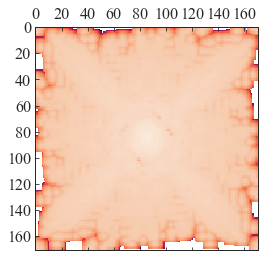

In [5]:
plt.matshow(np.log10(glee_psf_f160w_pl))

In [6]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting


def get_gaussian_fwhm(psf, pixel_size=0.08):
    # Generate fake data
    y, x = np.mgrid[:psf.shape[0], :psf.shape[1]]


    # Fit the data using astropy.modeling
    p_init = models.Gaussian2D(amplitude=np.max(psf), x_mean=psf.shape[0]/2., y_mean=psf.shape[0]/2.,
                               x_stddev=2, y_stddev=2, theta=0., fixed={'theta': True}
                              )
    fit_p = fitting.LevMarLSQFitter()

    with warnings.catch_warnings():
        # Ignore model linearity warning from the fitter
        warnings.simplefilter('ignore')
        p = fit_p(p_init, x, y, psf)

    print(p_init)
    print(p)
    # Plot the data with the best-fit model
    plt.figure(figsize=(10, 5))
    ax = plt.subplot(131)
    ax.matshow(np.log10(psf), origin='lower', cmap='cubehelix', vmin=-8)
    ax.set_title("PSF")

    ax = plt.subplot(132)
    ax.matshow(np.log10(p(x, y)), origin='lower', cmap='cubehelix', vmin=-8)
    ax.set_title("Gaussian model")

    ax = plt.subplot(133)
    ax.imshow(psf - p(x, y), origin='lower', cmap='RdBu')
    ax.set_title("Residual")
    
    return (p.x_stddev**2 + p.y_stddev**2)**0.5 * pixel_size * 2.355

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude      x_mean y_mean x_stddev y_stddev theta
    ------------------- ------ ------ -------- -------- -----
    0.10300699253139323   30.5   30.5      2.0      2.0   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude            x_mean      ...      y_stddev     theta
    ------------------- ----------------- ... ----------------- -----
    0.09193515263643433 30.00001598720738 ... 1.107945080442013   0.0


/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10


0.29518270510669825

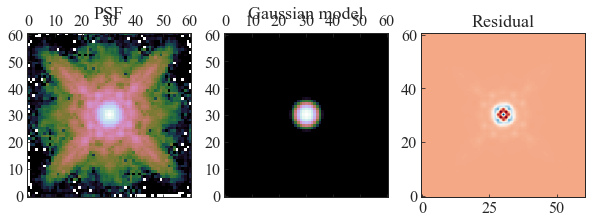

In [7]:
get_gaussian_fwhm(lenstronomy_psf_f160w_pl)

# F160W

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude      x_mean y_mean x_stddev y_stddev theta
    ------------------- ------ ------ -------- -------- -----
    0.10300699253139323   30.5   30.5      2.0      2.0   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude            x_mean      ...      y_stddev     theta
    ------------------- ----------------- ... ----------------- -----
    0.09193515263643433 30.00001598720738 ... 1.107945080442013   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude      x_mean y_mean x_stddev y_stddev theta
    ------------------- ------ ------ -------- -------- -----
    0.01489764854130235   85.5   85.5      2.0      2.0   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude            x_mean      ...      y_stddev      theta
    -----------

/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10
/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10


lenstronomy: 0.295", glee: 0.290"


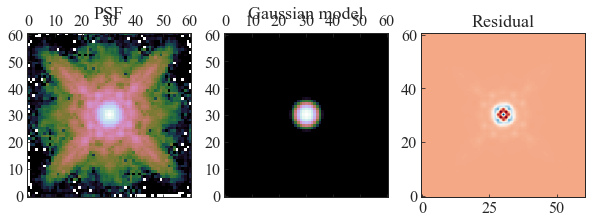

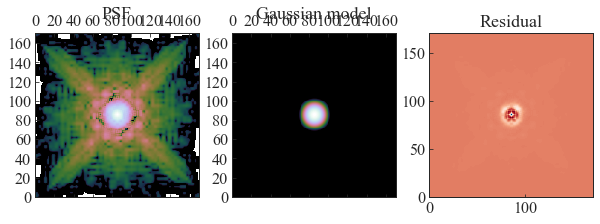

In [8]:
print('lenstronomy: {:.3f}\", glee: {:.3f}\"'.format(get_gaussian_fwhm(lenstronomy_psf_f160w_pl, 0.08), 
                                                     get_gaussian_fwhm(glee_psf_f160w_pl, 0.08/3.)))

In [9]:
0.005/0.295 * 100

1.694915254237288

# F160W, supersampled

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude      x_mean y_mean x_stddev y_stddev theta
    ------------------- ------ ------ -------- -------- -----
    0.01383481483599517  100.5  100.5      2.0      2.0   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude             x_mean      ...      y_stddev      theta
    -------------------- ----------------- ... ------------------ -----
    0.010777525830695724 99.98332099529209 ... 3.2863411235119275   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude      x_mean y_mean x_stddev y_stddev theta
    ------------------- ------ ------ -------- -------- -----
    0.01489764854130235   85.5   85.5      2.0      2.0   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude            x_mean      ...      y_stddev      theta
    -----

/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10
/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10


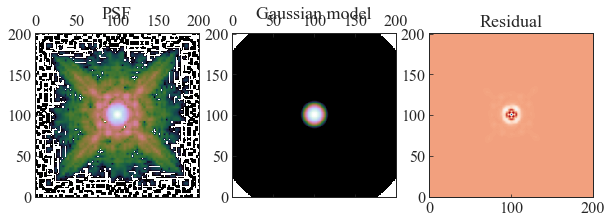

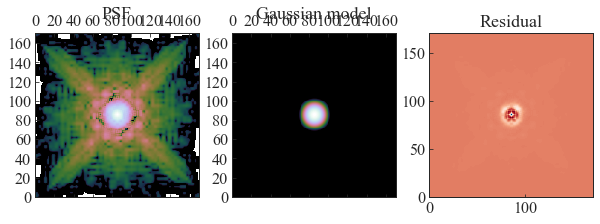

In [10]:
print('lenstronomy: {:.3f}\", glee: {:.3f}\"'.format(get_gaussian_fwhm(lenstronomy_psf_f160w_pl_supersampled, 0.08/3.), 
                                                     get_gaussian_fwhm(glee_psf_f160w_pl, 0.08/3.)))

In [11]:
0.005/0.295 * 100

1.694915254237288

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude       x_mean y_mean x_stddev y_stddev theta
    -------------------- ------ ------ -------- -------- -----
    0.010788747002394473  244.5  244.5      2.0      2.0   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude       x_mean y_mean      x_stddev           y_stddev      theta
    -------------------- ------ ------ ------------------ ------------------ -----
    0.009535094029557541  244.0  244.0 3.4993598515529287 3.4993598556416394   0.0


/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in log10
/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude      x_mean y_mean x_stddev y_stddev theta
    ------------------- ------ ------ -------- -------- -----
    0.01489764854130235   85.5   85.5      2.0      2.0   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude            x_mean      ...      y_stddev      theta
    ------------------- ----------------- ... ------------------ -----
    0.01078168371156335 84.96504773590556 ... 3.3139845374151946   0.0
lenstronomy: 0.311", glee: 0.290"


/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10


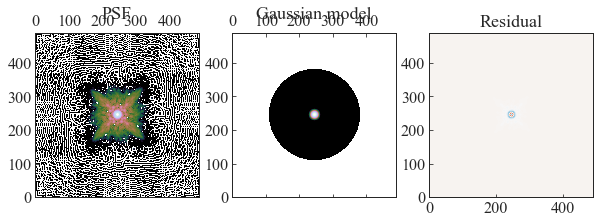

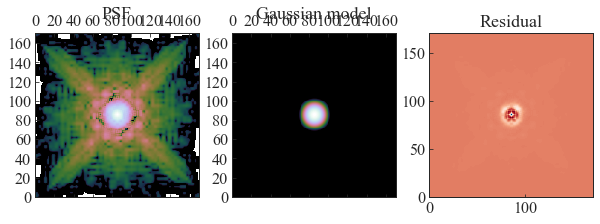

In [12]:
print('lenstronomy: {:.3f}\", glee: {:.3f}\"'.format(get_gaussian_fwhm(lenstronomy_psf_f160w_pl_supersampled_new, 0.08/3.), 
                                                     get_gaussian_fwhm(glee_psf_f160w_pl, 0.08/3.)))

# F814W

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude      x_mean y_mean x_stddev y_stddev theta
    ------------------- ------ ------ -------- -------- -----
    0.11513123789424447   30.5   30.5      2.0      2.0   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude            x_mean       ...      y_stddev      theta
    ------------------- ------------------ ... ------------------ -----
    0.11023980101873858 30.000031568882104 ... 0.9524414913459316   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude      x_mean y_mean x_stddev y_stddev theta
    ------------------- ------ ------ -------- -------- -----
    0.12933841552661074   28.5   28.5      2.0      2.0   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean      ...      y_stddev      theta
    ------

/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


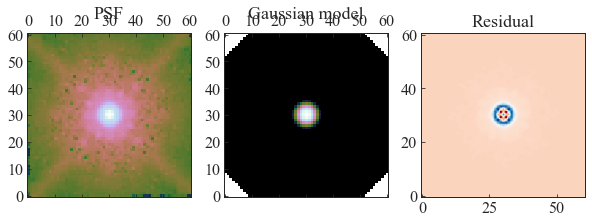

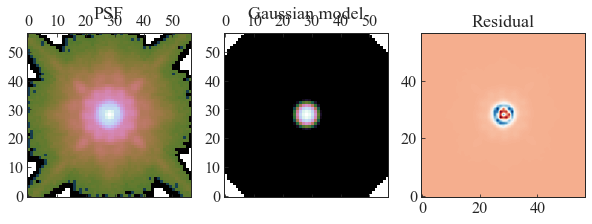

In [13]:
print('lenstronomy: {:.3f}\", glee: {:.3f}\"'.format(get_gaussian_fwhm(lenstronomy_psf_f814w_pl, 0.04), 
                                                     get_gaussian_fwhm(glee_psf_f814w_pl, 0.04)))

In [14]:
0.005/0.127 * 100

3.937007874015748

# F475X

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude      x_mean y_mean x_stddev y_stddev theta
    ------------------- ------ ------ -------- -------- -----
    0.10963497497114533   30.5   30.5      2.0      2.0   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude            x_mean       ...      y_stddev      theta
    ------------------- ------------------ ... ------------------ -----
    0.10328263059358454 30.000021861445934 ... 1.0118545562523733   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude      x_mean y_mean x_stddev y_stddev theta
    ------------------- ------ ------ -------- -------- -----
    0.14478287258284459   28.5   28.5      2.0      2.0   0.0
Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean      ...      y_stddev      theta
    ------

/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


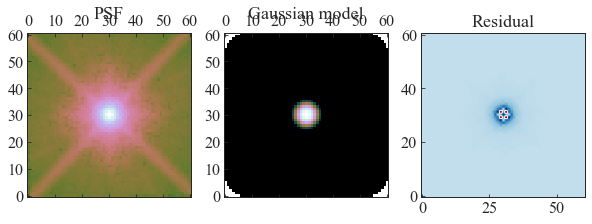

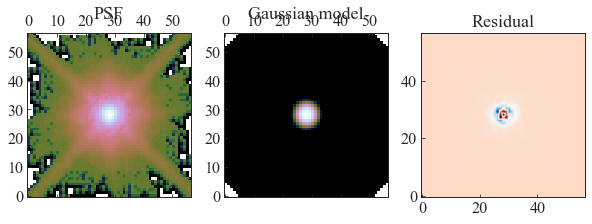

In [15]:
print('lenstronomy: {:.3f}\", glee: {:.3f}\"'.format(get_gaussian_fwhm(lenstronomy_psf_f475x_pl, 0.04), 
                                                     get_gaussian_fwhm(glee_psf_f475x_pl, 0.04)))

In [16]:
0.009/0.135 * 100

6.666666666666665

## make figure

In [22]:
for g in glee_psfs:
    print(g.shape)

(171, 171)
(57, 57)
(57, 57)


In [23]:
for l in lenstronomy_psfs:
    print(l.shape)

(201, 201)
(61, 61)
(61, 61)


/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/ajshajib/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10


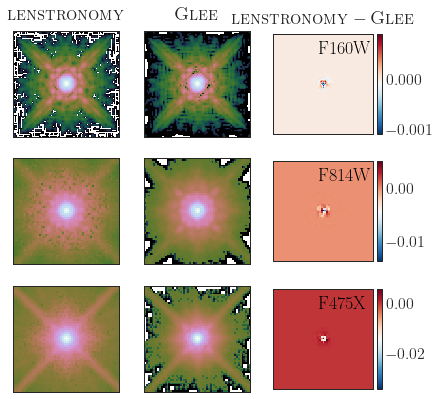

In [88]:
import paperfig as pf
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
#mpl.rc("text", usetex=false) # allow tex rendering
mpl.rcParams["font.family"] = "Times New Roman"#mplrc("axes", labelsize="18")


pf.set_fontscale(2.)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=pf.get_fig_size(width=pf.mnras_colwidth*2, height_ratio=1))

lenstronomy_psfs = [lenstronomy_psf_f160w_pl_supersampled[15:-15, 15:-15], 
                    lenstronomy_psf_f814w_pl[2:-2, 2:-2], lenstronomy_psf_f475x_pl[2:-2, 2:-2]]
glee_psfs = [glee_psf_f160w_pl, glee_psf_f814w_pl, glee_psf_f475x_pl]

for i, label in enumerate(['F160W', 'F814W', 'F475X']):
    axes[i, 1].matshow(np.log10(glee_psfs[i]), origin='lower', cmap='cubehelix', vmin=-8)
    axes[i, 0].matshow(np.log10(lenstronomy_psfs[i]), origin='lower', cmap='cubehelix', vmin=-8)
    
    
    divider = make_axes_locatable(axes[i, 2])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = axes[i, 2].matshow(-glee_psfs[i] + lenstronomy_psfs[i], origin='lower', cmap='RdBu_r') #, vmin=-1e-2 ) #, vmax=1e-2)

    fig.colorbar(im, cax=cax, orientation='vertical')
    
    axes[i, 2].text(0.45, 0.8, label, transform=axes[i, 2].transAxes, color='black')
    
    for j in range(3):
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

axes[0, 1].set_title(r'$\textsc{Glee}$')
axes[0, 0].set_title(r'$\textsc{lenstronomy}$')
axes[0, 2].set_title(r'$\textsc{lenstronomy} - \textsc{Glee}$')

fig.savefig('/Users/ajshajib/Dropbox/Papers_Proposals/2038_model/figures/psf_comparison.pdf', bbox_inches='tight')
fig;

In [94]:
(2.3 - 2.21) / np.sqrt(0.02**2 + 0.01**2)

4.024922359499615

In [90]:
0.09/2.3

0.0391304347826087